## Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city. For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas (which is covered in more detail in Chapter 3):

In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

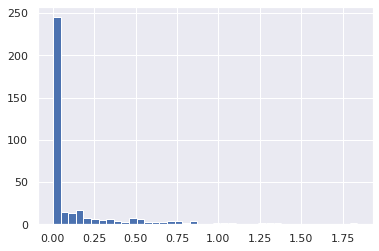

In [3]:
plt.hist(inches, 40);


## Comparison Operators as ufuncs

In [6]:
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than

array([ True,  True, False, False, False])

In [7]:
x > 3  # greater than


array([False, False, False,  True,  True])

In [8]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [9]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [10]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [11]:
x == 3  # equal

array([False, False,  True, False, False])

In [12]:
(2 * x) == (x ** 2)


array([False,  True, False, False, False])

In [13]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [14]:
x < 6


array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [15]:
print(x)


[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

In [16]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [17]:
np.sum(x < 6)


8

In [18]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [19]:
# are there any values greater than 8?
np.any(x > 8)

True

In [20]:
# are there any values less than zero?
np.any(x < 0)

False

In [21]:
# are all values less than 10?
np.all(x < 10)

True

In [22]:
# are all values equal to 6?
np.all(x == 6)

False

In [23]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean operators

In [25]:
np.sum((inches > 0.5) & (inches < 1))


29

In [27]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))


29

In [28]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

In [30]:
x < 5


array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [31]:
x[x < 5]


array([0, 3, 3, 3, 2, 4])

In [32]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


## Aside: Using the Keywords and/or Versus the Operators &/|

In [35]:
bool(42), bool(0)


(True, False)

bool(42 and 0)


In [36]:
bool(42 and 0)


False

In [37]:
bool(42 or 0)


True

In [38]:
bin(42)


'0b101010'

In [39]:
bin(59)


'0b111011'

In [40]:
bin(42 & 59)


'0b101010'

In [41]:
bin(42 | 59)


'0b111011'

In [42]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [44]:
A or B
# Similarly, when doing a Boolean expression on a given array, you should use | or & rather than or or and:

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [46]:
(x > 4) and (x < 8)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()